# Защита персональных данных клиентов страховой компании

Требуется защитить данные клиентов страховой компании. Нужно разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, и чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

## Загрузка данных

Загрузим неоходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Загружаем данные и изучаем их.

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('/personal_data/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.duplicated().sum()

153

In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Пропусков в данных нет. Дубликатов примерно 3%. Вполне вероятно, что данные некоторых клиентов совпадают, поэтому удалять дубликаты не будем. Аномалий не обнаружено.

Посмотрим зависимость целевого признака от других признаков

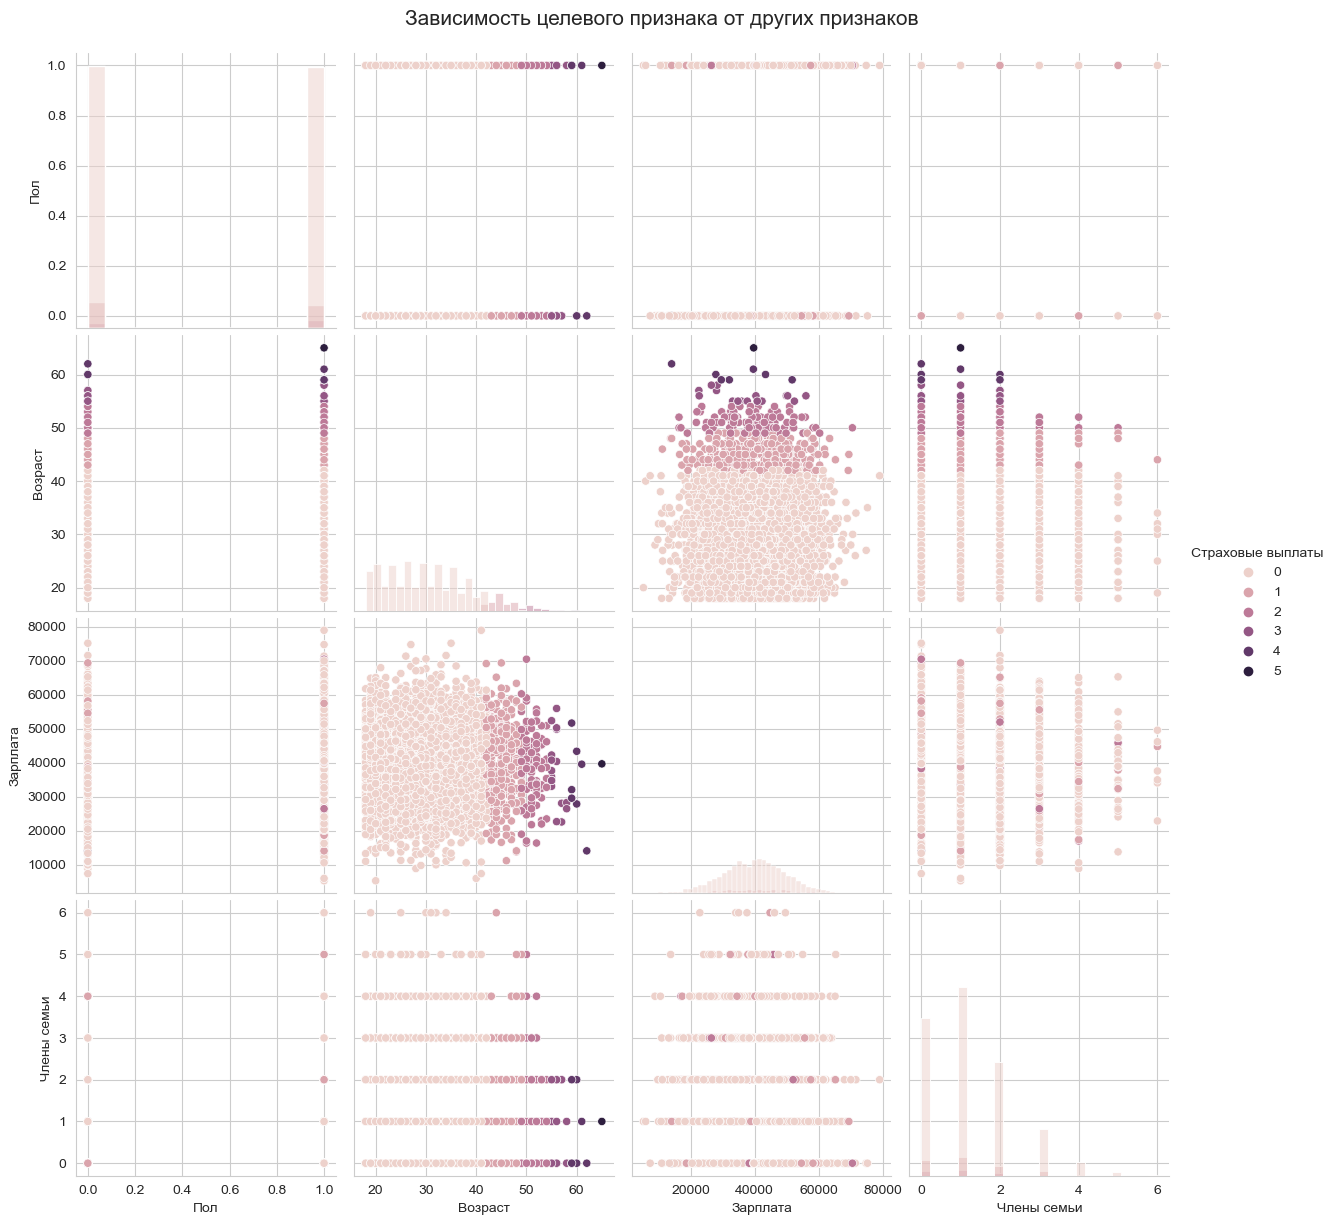

In [7]:
sns.set_style('whitegrid')
sns.pairplot(data, hue='Страховые выплаты', height=3, diag_kind='hist')
plt.suptitle("Зависимость целевого признака от других признаков", y=1.02, fontsize=15)
plt.show()

Делим данные на тренировочную и тестовую выборки в соотношении 80:20

In [8]:
features=data.drop(['Страховые выплаты'],axis=1)
target=data['Страховые выплаты']

In [9]:
train_features, test_features, train_target, test_target = train_test_split(features,target, test_size=0.2, random_state=42)

In [10]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(4000, 4)
(4000,)
(1000, 4)
(1000,)


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении данных признаков на обратимую матрицу качество модели Линейной регрессии не меняется.

**Обоснование:** Докажем, что при умножении признаков на обратимую матрицу, качество линейной регрессии не изменится. 

Для этого рассмотрим исходную формулу линейной регрессии:
$$
y = Xw
$$
где:
$y$ - вектор целевой переменной,
$X$ - матрица признаков,
$w$ - вектор весов (параметров модели).

Теперь заменим матрицу признаков $X$ на $X' = XP$, где $P$ - обратимая квадратная матрица. Подставим новое значение $X'$ в уравнение линейной регрессии:
$$
y = X'w'
$$
где:
$$
w' = P^{-1}w
$$
Мы можем провести данную подстановку, так как $X' = XP$ и, согласно свойству матриц, 
$$
(AB)^{-1} = B^{-1}A^{-1}
$$
и
$$
AA^{-1} = A^{-1}A = E.
$$
Теперь докажем, что качество линейной регрессии остается неизменным при такой замене.

Пусть $w_{0}$ - вектор весов, соответствующий исходной матрице признаков $X$, а $w_{1}$ - вектор весов, соответствующий новой матрице признаков $X' = XP$.

Тогда у нас есть:
$$
y = Xw_{0}
$$
$$
y = X'w_{1}
$$
$$
y = (XP)w_{1}
$$
Подставим выражение для $X'$:
$$
y = (XP)w_{1} = X(Pw_{1})
$$
Теперь заметим, что $w_{0} = Pw_{1}$, так как $𝑤₀$ и $𝑤₁$ - это просто разные представления вектора весов для исходной и новой матриц признаков соответственно.

Таким образом, получаем:
$$
y = X(Pw_{1}) = Xw_{0}
$$
Это означает, что новые предсказания $y$, полученные с использованием новой матрицы признаков $X'$, равны предсказаниям $y$, полученным с использованием исходной матрицы признаков $X$.

Таким образом, качество линейной регрессии не изменится при умножении признаков на обратимую матрицу.

## Алгоритм преобразования

**Алгоритм**

Создаём произвольную матрицу, длина которой совпадает с шириной матрицы с исходными данными, и проверяем её на обратимость.

Выполняем умножение полученной на основе тренировочной таблицы с признаками матрицы размером (4000, 4) на произвольную обратимую матрицу размером (4, 4). В результате получаем новую матрицу размером (4000, 4) с преобразованными признаками. 

То же самое делаем и с матрицей тестовой таблицы размером (1000, 4) - умножаем её на ту же обратимую матрицу и получаем новую матрицу размером (1000, 4).

Вектор $w$ вычисляем по формуле $w = (X^TX)^{-1}X^Ty$, где $X$ - таблица признков, в которой нулевой столбец заполнен (единицами), а $y$ - вектор целевого признака.

В модели Линейной регрессии предсказания вычисляются по формуле $a = Xw$.

Так же вычисляется вектор 𝑤 и делаются предсказания и на данных, полученных методом умножения на обратимую матрицу.

Сравним метрики качества обоих моделей чтобы убедиться, что результат предсказания не меняется не смотря на изменение признаков.

**Обоснование**

При умножении матрицы тренировочной таблицы и матрицы тестовой таблицы на одну и ту же обратимую матрицу мы получим такие же предсказания как и на исходных данных.

## Проверка алгоритма

Создаём модель, получаем предсказания на исходных данных и находим значение метрики R2

In [11]:
class LinearRegress:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [12]:
model = LinearRegress()
model.fit(train_features, train_target)
predict = model.predict(test_features)

R2_score = r2_score(test_target, predict)

print("R2_score:", R2_score.round(5))

R2_score: 0.43687


Создаём произвольную матрицу, длина которой совпадает с шириной матрицы с исходными данными, и проверяем её на обратимость

In [13]:
matrix=np.random.normal(3, size=(4,4))
matrix

array([[3.40984666, 4.75385895, 4.90838916, 2.33992164],
       [3.88409855, 3.48127127, 1.31223197, 2.16729556],
       [2.07622316, 2.08737481, 3.42313929, 3.30469318],
       [4.00217166, 1.29032062, 4.70683849, 3.44598818]])

In [14]:
matrix_1 = np.linalg.inv(matrix)
matrix_1

array([[-0.05803403,  0.21832283, -0.42099375,  0.30582815],
       [ 0.16877302,  0.08686276,  0.13370982, -0.29745977],
       [ 0.2252648 , -0.28497307, -0.13259733,  0.15342838],
       [-0.30348165,  0.10315646,  0.61998905, -0.16318131]])

Матрица обратима. Умножаем признаки тренировочной выборки на полученную обратимую матрицу.

In [15]:
train_matrix = train_features.dot(matrix)
train_matrix.columns = train_features.columns
train_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
4227,102639.340149,103180.268843,169131.408142,163294.300548
4676,131791.440334,132481.376745,217087.823519,209607.858239
800,60788.966543,61095.366909,100014.175737,96589.346050
3671,77410.404135,77804.809207,127403.226785,123033.393400
4193,80450.822932,80871.918220,132509.608712,127947.975867


То же самое делаем с тестовой выборкой

In [16]:
test_matrix = test_features.dot(matrix)
test_matrix.columns = test_features.columns
test_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
1501,116588.283995,117203.956324,192079.765282,185456.311764
2586,87129.455832,87579.739741,143485.849911,138545.229724
2653,54724.601964,55007.149513,90072.838783,86980.789501
1055,77571.061090,77970.853070,127736.784695,123339.306491
705,62461.597368,62775.710572,102756.623868,99239.602483


Обучаем модель и делаем предсказания на новых данных, находим метрику R2

In [17]:
model_1 = LinearRegress()
model_1.fit(train_features, train_target)
predict_1 = model_1.predict(test_features)

R2_score = r2_score(test_target, predict_1)

print("R2_score:", R2_score.round(5))

R2_score: 0.43687


Создаём произвольную матрицу и проверяем её наобратимость. Обозначим её А

In [18]:
A = np.random.normal(3, size=(4,4))
A

array([[1.86643861, 3.93015704, 2.47617789, 2.69087663],
       [2.23300496, 2.7294154 , 3.18176486, 2.22708834],
       [2.94631121, 3.07117734, 3.67197416, 2.15173504],
       [3.85992114, 2.31132759, 2.95326534, 2.8384335 ]])

In [19]:
np.linalg.inv(A)

array([[ 0.08403684, -1.4240417 ,  0.87803193,  0.37205093],
       [ 0.56475624, -1.25029014,  0.88174421, -0.22282104],
       [-0.52095533,  1.17078354, -0.1261479 , -0.3291164 ],
       [-0.03212792,  1.73648045, -1.78076587,  0.37023704]])

Матрица обратима

Умножаем матрицу тренировочной выборки на созданную обратимую матрицу. В результате получаем новую матрицу В

In [20]:
B =train_features.dot(A)
B.columns = train_features.columns
B.head()

,Пол,Возраст,Зарплата,Члены семьи
4227,145591.827860,151767.601549,181455.748614,106338.636846
4676,186888.944365,194825.332231,232932.680116,136512.387095
800,86127.700501,89792.595774,107355.051142,62924.812133
3671,109704.889209,114370.202765,136740.389730,80145.373693
4193,114080.302015,118925.527974,142188.125939,83330.050225


Умножаем матрицу тестовой выборки на созданную обратимую матрицу. В результате получаем новую матрицу С

In [21]:
С = test_features.dot(A)
С.columns = test_features.columns
С.head()

,Пол,Возраст,Зарплата,Члены семьи
1501,165352.449545,172373.402730,206089.316058,120777.384920
2586,123531.482203,128778.224777,153965.916554,90237.332617
2653,77556.841451,80857.776740,96670.849573,56660.134997
1055,109973.984620,114645.350168,137068.471881,80334.897270
705,88491.448485,92257.725895,110302.175766,64652.881427


В нулевой столбец полученной таблицы вносим значение 1

In [22]:
X = np.concatenate((np.ones((B.shape[0], 1)), B), axis=1)
pd.DataFrame(X).head()

,0,1,2,3,4
0,1.0,145591.827860,151767.601549,181455.748614,106338.636846
1,1.0,186888.944365,194825.332231,232932.680116,136512.387095
2,1.0,86127.700501,89792.595774,107355.051142,62924.812133
3,1.0,109704.889209,114370.202765,136740.389730,80145.373693
4,1.0,114080.302015,118925.527974,142188.125939,83330.050225


Присвоим переменной 𝑦 целевой признак и вычислим вектор 𝑤

In [23]:
y = train_target
w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

Вычислим предсказание модели методом умножения тестовой выбрки на вектор. Переменную предсказанных значений обозначим a

In [24]:
a = С.dot(w[1:]) + w[0]

Найдём значение R2

In [25]:
R2_score_m=r2_score(test_target, a)
print("R2_score:",R2_score_m.round(5))

R2_score: 0.43687


Сравним значения метрики R2 изменённоё и исходной матрицы признаков

In [26]:
comparison_tabl = pd.DataFrame(index=['R2_score'], columns=['Изменённая матрица','Неизменённая матрица'])
comparison_tabl['Изменённая матрица'] = R2_score_m.round(5)
comparison_tabl['Неизменённая матрица'] = R2_score.round(5)

comparison_tabl.T

,R2_score
Изменённая матрица,0.43687
Неизменённая матрица,0.43687


**Вывод**

Нам была поставлена задача защитить персональные данные клиентов страховой компании «Хоть потоп», для этого нужно разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Метод преобразования данных должен быть таким, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

Нами был разработан алгоритм, где данные были преобразованы методом умножения признаков исходных данных на обратимую матрицу. В результате была получена матрица признаков с изменёнными данными, которые надёжно зашифрованы и при этом сохранили неизменным качество модели обучения.

Поставленная задача полностью выполнена.